# APPLY NAIVE-BYES CLASSIFIER ON DATASET AND ANALYZE THE PREDICTION ACCURACY

In [ ]:
#import necessary library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#create naive bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
#make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
#modl performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy*100:.2f}%")


✅ Model Accuracy: 92.11%


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


In [ ]:
#classification
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



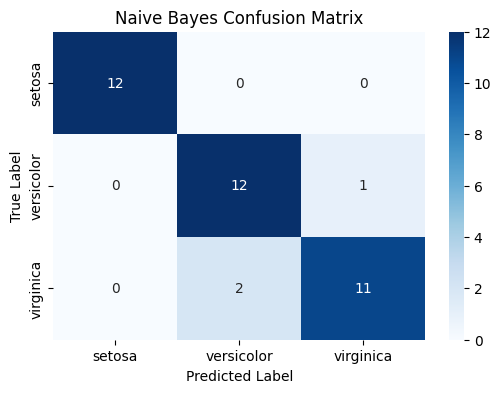

In [ ]:
#confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [ ]:
#analyse predictions
comparison = pd.DataFrame({
    "Actual": [iris.target_names[i] for i in y_test],
    "Predicted": [iris.target_names[i] for i in y_pred]
})
print("\nSample comparison of actual vs predicted labels:")
print(comparison.head(10))


Sample comparison of actual vs predicted labels:
       Actual   Predicted
0      setosa      setosa
1  versicolor  versicolor
2  versicolor  versicolor
3  versicolor  versicolor
4      setosa      setosa
5  versicolor  versicolor
6   virginica  versicolor
7   virginica   virginica
8   virginica   virginica
9   virginica   virginica
